In [ ]:
#https://www.kaggle.com/ozlemilgun/market-basket-analysis-with-apriori-algorithm

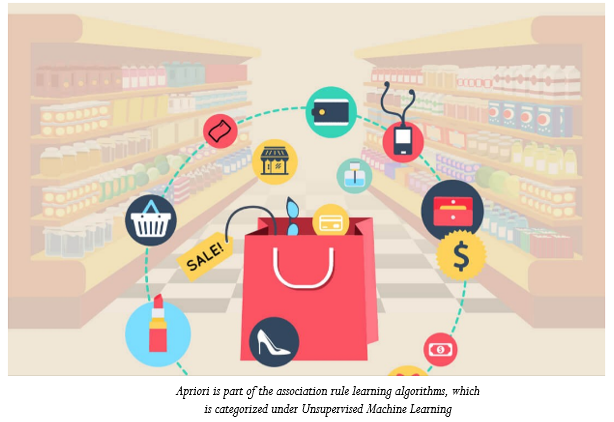

Association Rule Learning (ARL)
In today's world where the number of customers and transactions are increasing, it has become more valuable to create meaningful results from data and for developing marketing strategies. Revealing hidden patterns in the data in order to be able to compete better and maximize profit in the face of intense competition in the market, and to establish value-oriented long-term relationships with customers, makes a great contribution to determining marketing strategies.

However, the development of rule-based strategies is no longer possible in big data world, offering the right product to the right customer at the right time; it forms the basis of cross-selling and loyalty programs within the scope of customer retention and increasing lifetime value. Therefore, it has been crucial point for companies making product offers by using these patterns of association and developing effective marketing strategies Market Basket analysis is one of the association rule applications. It allows us to predict the products that customers tend to buy in the future by developing a pattern from their past behavior and habits.

There are different algorithms to be used for Association Rules Learning. One of them is the Apriori algorithm. In this project, product association analysis will be handled with “Apriori Algorithm” and the most suitable product offers will be made for the customer who is in the sales process, using the sales data of an e-commerce company.

Dataset Story:
• The Online Retail II data set, which includes the sales data of the UK-based online sales store, was used.

• Sales data between 01/12/2009 - 09/12/2011 are included in the data set.

• The product catalog of this company includes souvenirs.

Business Problem:
Suggesting products to users at the basket stage. In this study, we will apply Market Basket analysis using the Apriori algorithm. In this context, we will consider the work in 5 steps:

1. Import Data & Data Preprocessing

2. Preparing Invoice-Product Matrix fot ARL Data Structure

3. Determination of Association Rules

4. Suggesting appropriate product offers to customers at the basket stage

5. Functionalization

Variables Descriptions:
• InvoiceNo: Invoice Number -> If this code starts with C, it means that the operation has been canceled.

• StockCode: Product Code -> Unique number for each product

• Description: Product name

• Quantity: Number of products -> how many of the products on the invoices were sold.

• InvoiceDate

• UnitePrice

• CustomerID: Unique customer number

• Country

In [2]:
 #Import Libraries

import pandas as pd

# For Association Rules Learning & Apriori 
# !pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

# Setting Configurations:

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import Warnings:

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [3]:
!pip install openpyxl

In [4]:
df_= pd.read_excel('C:/Users/aozde/OneDrive/Documents/Columbia/Week-24/Online Retail.xlsx')
#df_ = pd.read_excel('../input/online-retail-dataset/online_retail_II.xlsx', sheet_name='Year 2010-2011')
df = df_.copy()

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom


In [6]:
## Data Preprocessing

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe().T

In [ ]:
# Let's first determine cancelled transactions (Invoice Id contains value "C") and then remove them:

df_Invoice = pd.DataFrame({"Invoice":[row for row in df["Invoice"].values if "C"  not in str(row)]})
df_Invoice.head()
df_Invoice = df_Invoice.drop_duplicates("Invoice")

In [ ]:
# The transactions except cancelled transactions:
df = df.merge(df_Invoice, on = "Invoice")

In [ ]:
# Outlier Detection:


# Outlier değerler için baskılama yapılacak low ve up limit belirleyelim:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


# Replace outliers with thresholds
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
  

In [ ]:
df.dtypes

In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int64","float64"] and "ID" not in col]

print(num_cols)

In [ ]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [ ]:
df.describe().T

In [ ]:
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]

In [ ]:
# Unique Number of Products (with Description)

df.Description.nunique()

In [ ]:
# Unique Number of Products (with StockCode)

df.StockCode.nunique()

The unique values of these 2 variables (Description & StockCode) should be equal, because each stock code represents a product:

In [ ]:
# 1st Step
df_product = df[["Description","StockCode"]].drop_duplicates()
df_product = df_product.groupby(["Description"]).agg({"StockCode":"count"}).reset_index()
df_product.sort_values("StockCode", ascending=False).head()

In [ ]:
df_product.rename(columns={'StockCode':'StockCode_Count'},inplace=True)

df_product = df_product[df_product["StockCode_Count"]>1]

Let's delete products with more than one stock code:

In [ ]:
print(df.StockCode.nunique())
print(df.Description.nunique())

In [ ]:
# 2nd Step
df_product = df[["Description","StockCode"]].drop_duplicates()
df_product = df_product.groupby(["StockCode"]).agg({"Description":"count"}).reset_index()
df_product.rename(columns={'Description':'Description_Count'},inplace=True)

In [ ]:
df_product = df_product.sort_values("Description_Count", ascending=False)
df_product.head()

In [ ]:
df_product = df_product[df_product["Description_Count"] > 1] 

df_product.head()

Let's delete stock codes that represent multiple products:

In [ ]:
df = df[~df["StockCode"].isin(df_product["StockCode"])]

In [ ]:
# Now each stock code represents a single product:

print(df.StockCode.nunique())
print(df.Description.nunique())

The post statement in the stock code shows the postage cost, let's delete it as it is not a product:

In [ ]:
df = df[~df["StockCode"].str.contains("POST", na=False)]

We'll handle sales data of Germany as an example:

In [ ]:
df_germany = df[df["Country"] == "Germany"]
df_germany.shape

2.Preparing Invoice-Product Matrix fot ARL Data Structure

In [ ]:
def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['Invoice', "StockCode"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)

In [ ]:
gr_inv_pro_df = create_invoice_product_df(df_germany, id=True)
gr_inv_pro_df.head()

In [ ]:
# Let's define a function to find the product name corresponding to the stock code:

def check_id(dataframe, stockcode):
    product_name = dataframe[dataframe["StockCode"] == stockcode]["Description"].unique()[0]
    return stockcode, product_name

In [ ]:
check_id(df_germany, 10002)

In [ ]:
check_id(df_germany, 47480)

In [ ]:
check_id(df_germany, 22977)

3. Determination of Association Rules
Calculate the support values for every possible configuration of items (thereshold of support has been chosen 0.01 (1%))

In [ ]:
frequent_itemsets = apriori(gr_inv_pro_df, min_support=0.01, use_colnames=True)

In [ ]:
frequent_itemsets.head()

In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)

rules.sort_values("support", ascending=False).head(5)

* Let's explain the metrics we see in the table above:

* antecedent support: If X is called antecendent, 'antecedent support' computes the proportion of transactions that contain the antecedent X.
* consequent support: If Y is called consequent, 'consequent support' computes the proportion of transactions that contain the antecedent Y.
* support: 'support' computes the proportion of transactions that contain the antecedent X and Y.
* confidence: Probability of buying Y when X is bought.
* lift: Represents how many times the probability of getting Y increases when X is received.

In [ ]:
#Let's sort dataframe by lift:

In [ ]:
sorted_rules = rules.sort_values("lift", ascending=False)

4.Suggesting a Product to Users at the Basket Stage

We can develop different strategies at the product offer stage.

For example, When X is bought, we can sort according to the probability of buying Y (confidence) and make a product offer, or we can make an offer according to how many times the probability of sales over the lift increases. We can also make a product recommendation with a hybrid filtering where support, lift and confidence are used together.

If user buys a product whose id is 22492, which products do you recommend?

In [ ]:
product_id = 22492

check_id(df, product_id)

First, define a function for recommending a product:

In [ ]:
product_id = 22554
recommendation_list = []


for idx, product in enumerate(sorted_rules["antecedents"]):
    # antecendent tuple olduğu için listeye çevirelim ve liste içinde arayalım:
    for j in list(product):
        if j == product_id:
            # bu yakaladığımız integer değerin indexi ne ise (idx) consequentte onu arayacağız, bulduğumuz satırlar için ilk ürünü [0]  önerelim 
            recommendation_list.append(list(sorted_rules.iloc[idx]["consequents"])[0])
            recommendation_list = list( dict.fromkeys(recommendation_list) )

Let's bring the top 5 most preferred products together with the product with id 22492.

In [ ]:
list_top5 = recommendation_list[0:5]
list_top5

In [ ]:
# Let's show the product names of top 5 recommended products:

for elem in list_top5:
    print(check_id(df_germany,elem))

What is next?

Each product and related products can be stored at the database level and an integrated structure can be established with the purchasing processes. Thus, while a customer is purchasing product A, the first 3 products related to this product can be offered as an offer by calling the relevant product from the database.

6. FUNCTIONALIZATION:

In [ ]:
# Import & Filter Data:

def data_filter(dataframe, country=False, Country=""):
    if country:
        dataframe = dataframe[dataframe["Country"] == Country]
    return dataframe

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
    
def data_prep(dataframe):
    
    # Data preprocessing:
    dataframe.dropna(inplace=True)
    
    # Delete if the product name contains "POST":
    dataframe = dataframe[~dataframe["StockCode"].str.contains("POST", na=False)]
    
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe = dataframe[dataframe["Price"] > 0]
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "Price")
    return dataframe

 
# Invoice Product Matrix:
def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['Invoice', "StockCode"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0) 
    
    
# Find Product name with Stock Code:

def check_id(dataframe, stockcode):
    product_name = dataframe[dataframe["StockCode"] == stockcode]["Description"].unique()[0]
    return stockcode, product_name


# Apriori Algorithm & ARL Rules:

def apriori_alg(dataframe, support_val=0.01):
    inv_pro_df = create_invoice_product_df(dataframe, id=True)
    frequent_itemsets = apriori(inv_pro_df, min_support=support_val, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=support_val)
    sorted_rules =  rules.sort_values("support", ascending=False) 
    return sorted_rules
    
    
  
         
def recommend_product(dataframe, product_id, support_val= 0.01, num_of_products=5):
    sorted_rules = apriori_alg(dataframe, support_val)
    recommendation_list = []  
    for idx, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[idx]["consequents"])[0])
                recommendation_list = list( dict.fromkeys(recommendation_list) )
    return(recommendation_list[0:num_of_products])

In [ ]:
# Data Preparation: 
df = df_.copy()

df = data_prep(df)
df = data_filter(df,country=True,Country="Germany")
df.head()

In [ ]:
def recommendation_system_func(dataframe,support_val=0.01, num_of_products= 5 ):
    product_id = input("Enter a product id:")
    
    if product_id in list(dataframe["StockCode"].astype("str").unique()):
        product_list = recommend_product(dataframe, int(product_id), support_val, num_of_products)
        if len(product_list) == 0:
            print("There is no product can be recommended!")
        else:
            print("Related products with product id -" , product_id , "can be seen below:")
        
            for i in range(0, len(product_list[0:num_of_products])):
                print(check_id(dataframe, product_list[i]))
            
    else:
        print("Invalid Product Id, try again!")

In [ ]:
# Enter product id - 1 (22326)

recommendation_system_func(df)

In [ ]:
# Enter product id - 2 (22725)

recommendation_system_func(df)

In [ ]:
# Enter product id - 3 (22809)

recommendation_system_func(df)

In [ ]:
# Enter product id - 4 (2256523)

recommendation_system_func(df)